In [1]:
import numpy as np

$$\newcommand{mmx}[2]{\left[\begin{matrix}#1 \\ #2\end{matrix}\right]}$$ 
$$\newcommand{mmxx}[4]{\left[\begin{matrix}#1 & #3 \\ #2 & #4\end{matrix}\right]}$$ 
$$\newcommand{mmmx}[3]{\left[\begin{matrix} #1 \\ #2 \\ #3\end{matrix}\right]}$$ 
$$\newcommand{BMAT}[1]{\begin{bmatrix}#1\end{bmatrix}}$$

$$\newcommand{\u}{\mathbf{u}}$$ 
$$\newcommand{\v}{\mathbf{v}}$$ 
$$\newcommand{\w}{\mathbf{w}}$$ 
$$\newcommand{\R}{\mathbb{R}}$$

1) What combination $c\mmx{1}{2}+d\mmx{3}{1}$ produces $\mmx{14}{8}$? Express this question as two equations for the coefficients $c$ and $d$ in the linear combination.

\begin{align}
c+3d&=14\\
2c+d&=8 \implies -5d=-20 \implies d=4 \implies c=2
\end{align}

2) Write the solution as a sum using `numpy`.

In [2]:
c = 2
d = 4
c*np.array([1,2])+d*np.array([3,1])

array([14,  8])

3) Can three vectors in the $xy$ plane (i.e. $\R^2$) have $\u\cdot\v < 0$, $\v\cdot\w < 0$, and $\u\cdot\w < 0$? I don't know how many vectors in $xyz$ (i.e. $\R^3$) space can have all negative dot products. (Four of those vectors in the plane would certainly be impossible ...).

In [3]:
import os
os.chdir('../..')


In [4]:
from lib.plot_tools import initialize_2d_plot, draw_2d_vector

In [5]:
u = np.array([-1,1])
v = np.array([2,1])
u.dot(v)

-1

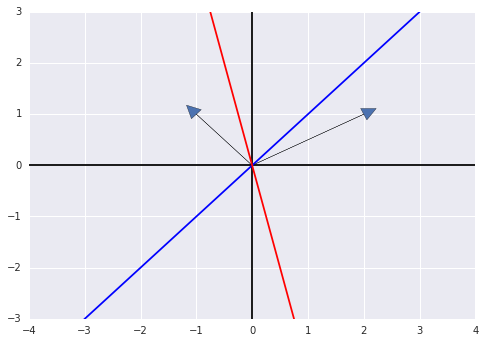

In [6]:
figure_1 = initialize_2d_plot(x_min=-4,x_max=4,y_min=-3,y_max=3)
draw_2d_vector(u,figure_1)
draw_2d_vector(v,figure_1)
indep = np.arange(-4, 4)
perp_u = indep
perp_v = -4*indep
figure_1.plot(indep, perp_u, "b-", )
figure_1.plot(indep, perp_v, "r-", )

Note that the blue line is perpendincular to $\u$. In order for there to be a $\w$ such that $\u\cdot\w<0$, $\w$ would have to be on the right side of this line. A line $\w$ with $\u\cdot\w<0$, would have to be on the left side of the red line. If we let $\w=(-1,-2)$, then

In [7]:
w = np.array([-1,-2])
v.dot(w), u.dot(w)

(-4, -1)

4) Find four perpendicular unit vectors with all components equal to $\frac{1}{2}$ or $-\frac{1}{2}$.

In [8]:
from numpy.linalg import norm

In [9]:
u_1 = np.array([-.5,.5,.5,.5])
u_2 = np.array([.5,-.5,.5,.5])
u_3 = np.array([.5,.5,-.5,.5])
u_4 = np.array([.5,.5,.5,-.5])
print(norm(u_1), norm(u_2), norm(u_3), norm(u_4))
print(u_1.dot(u_2), u_1.dot(u_3), u_1.dot(u_4),u_2.dot(u_3), u_2.dot(u_4),u_3.dot(u_4))


1.0 1.0 1.0 1.0
0.0 0.0 0.0 0.0 0.0 0.0


5) Use `numpy` to show that these vectors are unit vectors. 

*See above.*

6) Find a combination $\alpha\u+\beta\v+\gamma\w$ that gives the zero vector. 

\begin{align*}
\mathbf{u}&=\mmmx{1}{2}{3} & 
\mathbf{v}&=\mmmx{4}{5}{6} & 
\mathbf{w}&=\mmmx{7}{8}{9}
\end{align*}

\begin{align}
\BMAT{ 1 & 4 & 7 \\\\ 2 & 5 & 8 \\\\ 3 & 6 & 9}
\mathbf\gamma&=
\mathbf 0 \\\\
\BMAT{ 1 & 4 & 7 \\\\ 0 & -3 & -6 \\\\ 0 & -6 & -12}
\mathbf\gamma&=
\mathbf 0\\\\
\BMAT{ 1 & 4 & 7 \\\\ 0 & -3 & -6 \\\\ 0 & 0 & 0}
\mathbf\gamma&=
\mathbf 0\\
\\end{align}

This shows that we have one *free* value. Let $\gamma_3=1$, then $\mathbf \gamma = (1,-2,1)$. 

Are $\u$, $\v$, $\w$ independent or dependent? Why? 

These three vectors are not independent, because $\mathbf u+\mathbf w = \mathbf v$.

If the three vectors form a matrix $A$ with those columns, is it invertible?

The matrix would not be invertible.


7) Write $A$ as a matrix in `numpy`. Display the matrix. 

**NOTE:** Conversation about row order vs. column order. 

## Markov Matrices

8) You should do this with `numpy`. Start with the vector $\u_0 = (1,0)$. Multiply again and again by the same "Markov matrix" 
$A =\mmxx{.8}{.2}{.3}{.7}$. Find $\u_i = A\u_{i-1}$ for $i\in[1,3]$

In [12]:
u = np.array([1,0])
A = np.array([[.8,.3],[.2,.7]])

In [17]:
print(A.dot(u))
print(A.dot(A).dot(u))
print(A.dot(A).dot(A).dot(u))

[ 0.8  0.2]
[ 0.7  0.3]
[ 0.65  0.35]


9) Write a `for` loop to do this through $\u_7$. What do you notice about $\u_7$?

In [18]:
u_new = A.dot(u)
for _ in range(8):
    u_new = A.dot(u_new)
u_new

array([ 0.60078125,  0.39921875])

10) There is a steady-state $\u_s$ where $A\u_s=\u_s$. Find it.

In [19]:
u_new = A.dot(u)
for _ in range(100):
    u_new = A.dot(u_new)
u_new

array([ 0.6,  0.4])